In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import pandas as  pd

import random
import os


In [3]:
class config:
    seed = 42

In [4]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [5]:
seed_everything(config.seed)

In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
batch_size = 1

In [7]:
### transform 설정
normalize = transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]],std=[x/255.0 for x in [63.0, 62.1, 66.7]])

transform0 = transforms.Compose([                transforms.ToTensor(),normalize,])

transform_array = []
#transform_array.append(transform0)
for i in [0]: #[0,1]:
    for j in [2,3,4,6,7,8,9,10]: #[0,5,15]:
        for k in [0]: #[0,0.1,0.2,0.3,0.4]:
            transform1  = transforms.Compose([transforms.RandomHorizontalFlip(p = i),transforms.RandomRotation(degrees = j),transforms.RandomAffine(degrees = 0, translate =(k,k)),  transforms.ToTensor(), normalize, ])  
            transform_array.append(transform1)



In [8]:
trainset0 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform0) 
trainloader0 = torch.utils.data.DataLoader(trainset0, batch_size=batch_size, shuffle=False, num_workers=2)

trainset_array = []
trainloader_array = []

#trainset_array.append(trainset0)
#trainloader_array.append(trainloader0)

for i in range(len(transform_array)):
    trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform_array[i]) 
    trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=batch_size, shuffle=False, num_workers=2) 

    trainset_array.append(trainset1)
    trainloader_array.append(trainloader1)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
trainset0

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.4913725490196078, 0.4823529411764706, 0.4466666666666667], std=[0.24705882352941178, 0.24352941176470588, 0.2615686274509804])
           )

In [ ]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


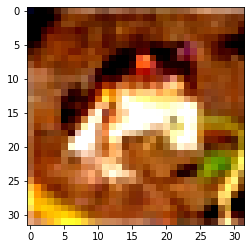

 frog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


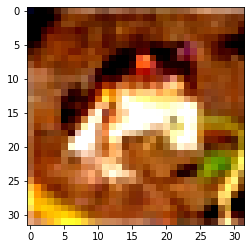

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


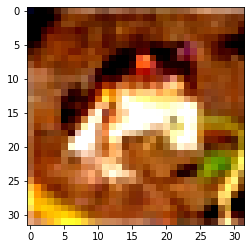

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


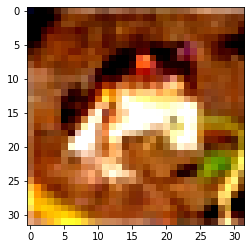

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


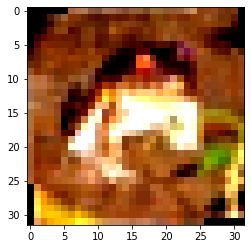

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


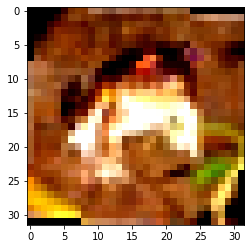

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


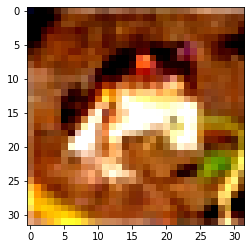

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


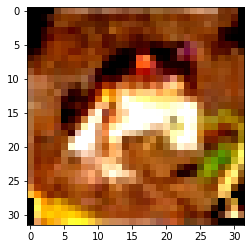

In [ ]:
# get some random training images
dataiter0 = iter(trainloader0)
images0, labels0 = dataiter0.next()

# show images
imshow(torchvision.utils.make_grid(images0))
# print labels
print(' '.join('%5s' % classes[labels0[j]] for j in range(batch_size)))
#####################################################################################

for i in range(len(transform_array)):
    dataiter1 = iter(trainloader_array[i])
    images1, labels1 = dataiter1.next()
    imshow(torchvision.utils.make_grid(images1))    


In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [12]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
PATH = '/content/drive/MyDrive/Colab Notebooks/졸업논문/cifar_net.pth'
#torch.save(net.state_dict(), PATH)

In [14]:
new_net = Net()
new_net.load_state_dict(torch.load(PATH))
new_net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
new_net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
list(new_net.children())[:-3]

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

In [17]:
new_net = torch.nn.Sequential(*(list(new_net.children())[:-3]))

In [18]:
new_net

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
)

In [ ]:
for name, param in new_net.named_parameters():
    print('name: ', name)
    print(type(param))
    print('param.shape: ', param.shape)
    print('param.requires_grad: ', param.requires_grad)
    print(param)
    print('=====')

name:  0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:  torch.Size([6, 3, 5, 5])
param.requires_grad:  True
Parameter containing:
tensor([[[[ 2.7002e-01, -5.0787e-01,  4.1590e-01,  1.0220e+00,  3.8942e-01],
          [ 7.2975e-01, -1.0145e-01, -7.4821e-01,  3.2368e-01,  6.8705e-01],
          [ 5.8971e-02,  5.7796e-01,  3.1181e-01, -4.8487e-01, -4.5035e-01],
          [ 4.8330e-01,  5.3291e-01,  2.6680e-01, -1.1349e+00, -9.8459e-01],
          [ 8.8879e-01, -4.9492e-01, -5.4215e-01, -6.3235e-01,  1.4518e-01]],

         [[-7.8665e-01, -1.0264e+00, -4.5084e-03,  4.2914e-01, -5.2570e-01],
          [ 6.3407e-02, -4.6388e-02, -7.4258e-01,  1.0602e-02,  3.4173e-02],
          [-3.5220e-01,  6.4580e-01,  3.1853e-01, -2.8276e-01, -6.4565e-01],
          [-3.2316e-01,  4.6307e-01,  4.1925e-01, -5.9142e-01, -8.6928e-01],
          [ 5.0772e-01, -2.2444e-01, -2.1866e-01, -5.1614e-01,  1.8417e-01]],

         [[-8.0763e-01, -9.3628e-01, -2.3770e-01,  2.2722e-01, -3.3783e-01],
      

In [ ]:
dataiter = iter(trainloader0)
images, labels = dataiter.next()

In [ ]:
print(labels.shape)
print(images.shape)

torch.Size([1])
torch.Size([1, 3, 32, 32])


In [19]:
new_net.eval()

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
)

In [ ]:
with torch.no_grad():
    outputs = new_net(images.to(device))

In [ ]:
outputs.shape

torch.Size([1, 16, 10, 10])

In [20]:
def get_cosine_similarity(x1, x2):
    return (x1 * x2).sum() / ((x1**2).sum()**.5 * (x2**2).sum()**.5)

In [21]:
def image_array_save(image_array,dataloader) :
    i = 0
    with torch.no_grad():
        for data in dataloader:
            if i == 500:
                break
            i=i+1    
            images, labels = data
            outputs = new_net(images.to(device))
            image_array.append(outputs)        

In [22]:
image_array = []

image_0 = [] 
image_array_save(image_0,trainloader0)


image_elements_array = []   
for i in range(len(transform_array)):
    image_elements_array = []    
    image_array_save(image_elements_array,trainloader_array[i])
    image_array.append(image_elements_array)

In [ ]:
len(image_array)

3

In [23]:
def cosine_sim(image_1,image_2):
    ret_total = 0
    for i in range(500):
        ret = get_cosine_similarity(image_1[i], image_2[i])
        ret_total = ret_total+ret
    print(ret_total/500)   

In [ ]:
for i in range(len(transform_array)):
    print(i)
    cosine_sim(image_0,image_array[i])

0
tensor(0.9765, device='cuda:0')
1
tensor(0.9043, device='cuda:0')
2
tensor(0.8423, device='cuda:0')


In [ ]:
############################# PCA 적용해서 유사도 판별에 사용할 차원 줄여보기 #######################################
#### PCA를 통해 추출한 주성분으로 유사도 비교

In [24]:
from sklearn.decomposition import PCA

In [25]:
image_0[0].shape

torch.Size([1, 16, 10, 10])

In [26]:
X = image_0
for i in range(len(X)) : #넘파이로 변환하기 위해 cpu로 변경
    X[i] = X[i].reshape(1600).cpu().numpy()

In [27]:
X[0]

array([ 85.97884 ,  80.377396,  53.730953, ..., 185.04433 , 193.25446 ,
       172.77129 ], dtype=float32)

In [47]:
pca = PCA(n_components=20)
pca.fit_transform(X)

array([[ 1968.76858336,  1549.02549592,  -120.90094596, ...,
          -33.36007484,   134.82318023,   107.1408469 ],
       [-1361.28919387,  -987.28874808,  -600.52522438, ...,
         -319.86017046,  -105.83196656,  -424.06999147],
       [ -915.50905876,  -533.40186462,  -391.0262855 , ...,
          186.55693135,  -276.78894639,  -100.97813657],
       ...,
       [ 1000.48664213,  -910.6351719 ,   868.81485663, ...,
          -69.36434002,  -299.8234899 ,   -43.08035658],
       [ 2301.58388175,  -342.70371602, -1661.56381712, ...,
           -7.04290923,  -337.41536755,   -46.82978987],
       [-2642.04806215,   240.0922311 ,   605.75354076, ...,
          -89.12458485,   -47.37814155,   -70.59439136]])

In [48]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))
#80이 넘는 지점을 선택

0     0.376044
1     0.522168
2     0.609298
3     0.664928
4     0.712506
5     0.741475
6     0.765368
7     0.784028
8     0.798902
9     0.812369
10    0.821970
11    0.830759
12    0.839405
13    0.846457
14    0.853073
15    0.859036
16    0.863984
17    0.868814
18    0.873278
19    0.877376
dtype: float64

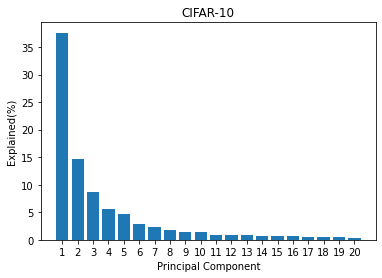

In [53]:
# PCA 결과의 각 성분의 설명력에 대한 그래프 그리기
# https://alex-blog.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D3-PCA 블로그 참조
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Explained(%)')
plt.xlabel('Principal Component')
plt.title('CIFAR-10')
plt.show()

In [44]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.37604354 0.14612482 0.08713001 0.05562919 0.04757845 0.02896877
 0.02389367 0.01865988 0.01487389 0.01346688]
0.8123691066252273


In [45]:
x_pca

array([[ 1.96876858e+03,  1.54902550e+03, -1.20900946e+02, ...,
        -1.21836161e+02,  4.09217211e+00, -4.06870696e+02],
       [-1.36128919e+03, -9.87288748e+02, -6.00525224e+02, ...,
        -4.04990350e+02,  1.21421846e+02,  1.91939103e+02],
       [-9.15509059e+02, -5.33401865e+02, -3.91026285e+02, ...,
        -8.32446871e+01, -4.57935920e+02, -3.25677969e+02],
       ...,
       [ 1.00048664e+03, -9.10635172e+02,  8.68814857e+02, ...,
        -5.95484586e+02, -5.10830706e+02,  1.96744131e+02],
       [ 2.30158388e+03, -3.42703716e+02, -1.66156382e+03, ...,
         2.12114910e+02,  2.44764966e+02,  2.20181496e+00],
       [-2.64204806e+03,  2.40092231e+02,  6.05753541e+02, ...,
         2.48491780e+02,  1.01739156e+02,  5.10015724e+02]])

In [ ]:
for i in range(len(image_array)):
    X_1 = image_array[i]
    for j in range(len(X_1)) : #넘파이로 변환하기 위해 cpu로 변경
        image_array[i][j] = image_array[i][j].reshape(1600).cpu().numpy()
    print(i)
    cosine_sim(x_pca,pca.transform(image_array[i]))


0
0.9999986928816348
1
0.9996143672244262
2
0.9983245151697623
3
0.9959682233743351
4
0.9942256474897961
5
0.9940449713205821
6
0.9912294162641069
7
0.9903158119183244
